<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-Air-Pollution-Thailand-and-South-East-Asian-Countries" data-toc-modified-id="Model-Air-Pollution-Thailand-and-South-East-Asian-Countries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model Air Pollution Thailand and South East Asian Countries</a></span></li><li><span><a href="#Requirements" data-toc-modified-id="Requirements-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Requirements</a></span></li><li><span><a href="#Directory-Tree" data-toc-modified-id="Directory-Tree-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Directory Tree</a></span></li><li><span><a href="#Data-Sources" data-toc-modified-id="Data-Sources-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Sources</a></span><ul class="toc-item"><li><span><a href="#Pollution-Data" data-toc-modified-id="Pollution-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Pollution Data</a></span></li><li><span><a href="#Weather-Data" data-toc-modified-id="Weather-Data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Weather Data</a></span></li><li><span><a href="#Hotspot-Data" data-toc-modified-id="Hotspot-Data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Hotspot Data</a></span></li></ul></li><li><span><a href="#AQI-Convention" data-toc-modified-id="AQI-Convention-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>AQI Convention</a></span></li></ul></div>

# Model Air Pollution Thailand and South East Asian Countries

# Requirements

numpy==1.18.1<br>
matplotlib==3.1.2<br>
pandas==1.0.0<br>
geopandas==0.6.2<br>
scikit_optimize==0.7.4 <br>
scikit_learn==0.23.2<br>
TPOT==0.11.5<br>
statsmodels==0.11.1<br>
scipy==1.4.1<br>
seaborn==0.10.0<br>
joblib==0.14.1<br>
tqdm==4.43.0<br>
Shapely==1.7.0<br>
pyproj==2.4.2.post1<br>
Fiona==1.8.13<br>
bokeh==2.1.1<br>
selenium==3.141.0 <br>
wget==3.2<br>
beautifulsoup4==4.9.1<br>
requests==2.22.0<br>
swifter==1.0.3<br>
Sphinx>=1.6.0<br>

# Directory Tree

<pre>
├── README.md   
├── requirements.txt : generated by pipreqs
├── data : raw data and processed data for each cities. Please see the data section for details about how to obtains the raw data
├── docs._build.html : code documentations generated by Sphinx 
├── models : each subfolder contains a model for a each city.  
│   ├──  chiang_mai : contains random forest models for Chiang Mai and model meta file containing setting
│   └── bangkok   
├── reports : plots for each city 
│   ├── chiang_mai : data and model visualizations for Chiang Mai
│   └── bangkok   
├── notebooks   
│   ├── 1_pollutions_data.ipynb : 
│   ├── 1.1_vn_power_plants.ipynb : 
│   ├── 2_analyze_pollution_data.ipynb : 
│   ├── 5.0-ML_Chiang_mai.ipynb : 
│   ├── 6.0_vis_ChiangMai.ipynb : 
│   ├── 6.1_BKK.ipynb : 
│   ├── 6.2_vis_Jarkata.ipynb : 
│   ├── 6.3_Hanoi.ipynb : 
│   └── 7_prediction.ipynb : 
│   
└── src  
    ├── imports.py : 
    ├── gen_functions.py : general purpose functions such as color setting, AQI conversion and coordinate Conversion
    ├── data : download and preprocess data 
    │   ├── download_data.py :  download pollution data from various sources 
    │   ├── read_data.py :  read pollution data 
    │   ├── vn_data.py : scrape pollution data from Vietnamese EPA
    │   ├── weather_data.py : scrape, process and load weather data
    │   └── fire_data.py : process and load hotspots data
    │     
    ├── features   
    │   ├── build_features.py : 
    │   └── dataset.py : Dataset object is responsible for putting raw data together, 
    │                    feature engineering and preparing matricies for machine learning models. 
    │                    Call read_data.py when loading data
    │                    Call build_features.py for feature engineering functions 
    ├── models   
    │   ├── train_model.py :  model builder and hyperparameter searcher
    │   └── predict_model.py : load model and perform statistical simulations
    │   
    └── visualization  
        ├── vis_data.py : create plots for data exploration steps   
        └── vis_model.py : create plots for visualizing model performance and simulation 
</pre>

# Data Sources

## Pollution Data
 - [Thailand Pollution Department](http://air4thai.pcd.go.th/webV2/) Data only go back 2 months! so need to run scapper once a month. Once can also writes a letter to ask for historical data directly. The request took about a month to process. The data has to be parsed from their excel files.  
 - [Vietnamese Pollution Department](http://enviinfo.cem.gov.vn/) Pollution data for major cities such as Hanoi. Data only go back 24 hours, so need to run scapper once a day.
 - [Berkeley project](http://berkeleyearth.org/) provides historical PM2.5 data back until late 2016 
 - [US Embassy](http://dosairnowdata.org/dos/historical/) US embassy in some cities collect PM2.5 data. 
 - [The World Air
Quality Project](https://aqicn.org/) has pollutions data from many cities, but only provide daily average data  

## Weather Data 

## Hotspot Data 

# AQI Convention

Countries have different AQI standards. The figure belows compare US and Thailand AQI. The standards are comparable except for SO$_2$, where the US has stricker standard. 

In [18]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import src

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


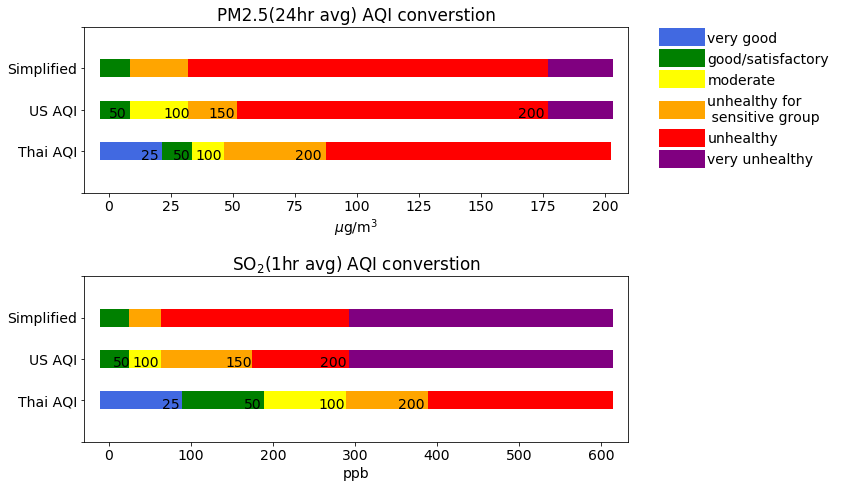

In [17]:
src.visualization.vis_data.compare_aqis(filename='../reports/chiang_mai/aqi.png')